## 유저, 아이템 major judging

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

In [4]:
data_dir = '/opt/ml/input/data/train/'

In [5]:
raw_data = pd.read_csv(os.path.join(data_dir, 'train_ratings.csv'))
# item info
writers = pd.read_csv(os.path.join(data_dir, 'writers.tsv'), sep='\t')
director = pd.read_csv(os.path.join(data_dir, 'directors.tsv'), sep='\t')
title = pd.read_csv(os.path.join(data_dir, 'titles.tsv'), sep='\t')
genre = pd.read_csv(os.path.join(data_dir, 'genres.tsv'), sep='\t')
year = pd.read_csv(os.path.join(data_dir, 'years.tsv'), sep='\t')

In [6]:
raw_data.groupby('item').count().describe()

,user,time
count,6807.000000,6807.000000
mean,757.230939,757.230939
std,1682.973090,1682.973090
min,27.000000,27.000000
25%,90.000000,90.000000
50%,197.000000,197.000000
75%,610.500000,610.500000
max,19699.000000,19699.000000


-----------------------

### 유저별 메이저 영화의 비율 계산

In [7]:
def get_item_count(data):
    itemcount = data.groupby('item').count()
    return {itemcount.iloc[i].name : itemcount.iloc[i]['user'] for i in range(itemcount.shape[0])}

item_count = get_item_count(raw_data)

In [8]:
users_new = list(raw_data['user'])
items_new = [item_count[i] for i in raw_data['item']]
count_df = pd.DataFrame(zip(users_new,items_new), columns=['user','item_count'])
items_bool = list(count_df['item_count'] >=2500)
bool_df = pd.DataFrame(zip(users_new,items_bool), columns=['user','major'])

In [9]:
ratio_df = bool_df.groupby('user').agg(['sum', 'count'])['major']
temp = {ratio_df.iloc[i].name : round(ratio_df.iloc[i]['sum']/ratio_df.iloc[i]['count'],2)  for i in range(ratio_df.shape[0])}

In [10]:
ratios = pd.DataFrame(zip(temp.keys(),temp.values()), columns=['user','ratio'])

In [11]:
ratios['ratio'].describe()

count    31360.000000
mean         0.598029
std          0.176820
min          0.000000
25%          0.470000
50%          0.610000
75%          0.730000
max          1.000000
Name: ratio, dtype: float64

In [23]:
rt = sorted(list(ratios['ratio']),reverse = True)

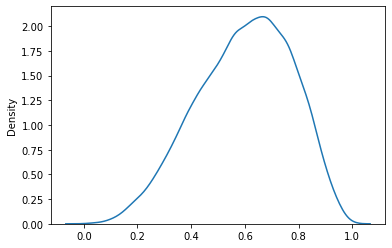

In [43]:
plt.figure()
sns.kdeplot(rt)
plt.show()

In [44]:
user_unique = raw_data['user'].unique()
major = [True if r > 0.9 else False for r in ratios['ratio']]

---------------------------

In [45]:
major_user = pd.DataFrame(zip(user_unique,major), columns=['user','major'])
super_major = list(major_user[major_user['major']==True]['user'])

In [59]:
raw_data.groupby('user').count().describe()

,item,time
count,31360.000000,31360.000000
mean,164.364509,164.364509
std,150.009107,150.009107
min,16.000000,16.000000
25%,71.000000,71.000000
50%,114.000000,114.000000
75%,200.000000,200.000000
max,2912.000000,2912.000000


In [58]:
raw_data.groupby('user').count().loc[super_major].describe()

,item,time
count,635.000000,635.000000
mean,85.152756,85.152756
std,36.825665,36.825665
min,16.000000,16.000000
25%,58.000000,58.000000
50%,75.000000,75.000000
75%,98.000000,98.000000
max,245.000000,245.000000


In [62]:
super_major_data = raw_data[raw_data['user'].isin(super_major)]
super_major_data.to_csv('super_major.csv',index=False)

-------------------------

In [34]:
major_user.to_csv("majoruser.csv", index=False)

In [35]:
major_user['major'].describe()

count     31360
unique        2
top       False
freq      27465
Name: major, dtype: object